In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Loading the dataset and displaying its first few rows
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Encode the species column
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Split the dataset into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



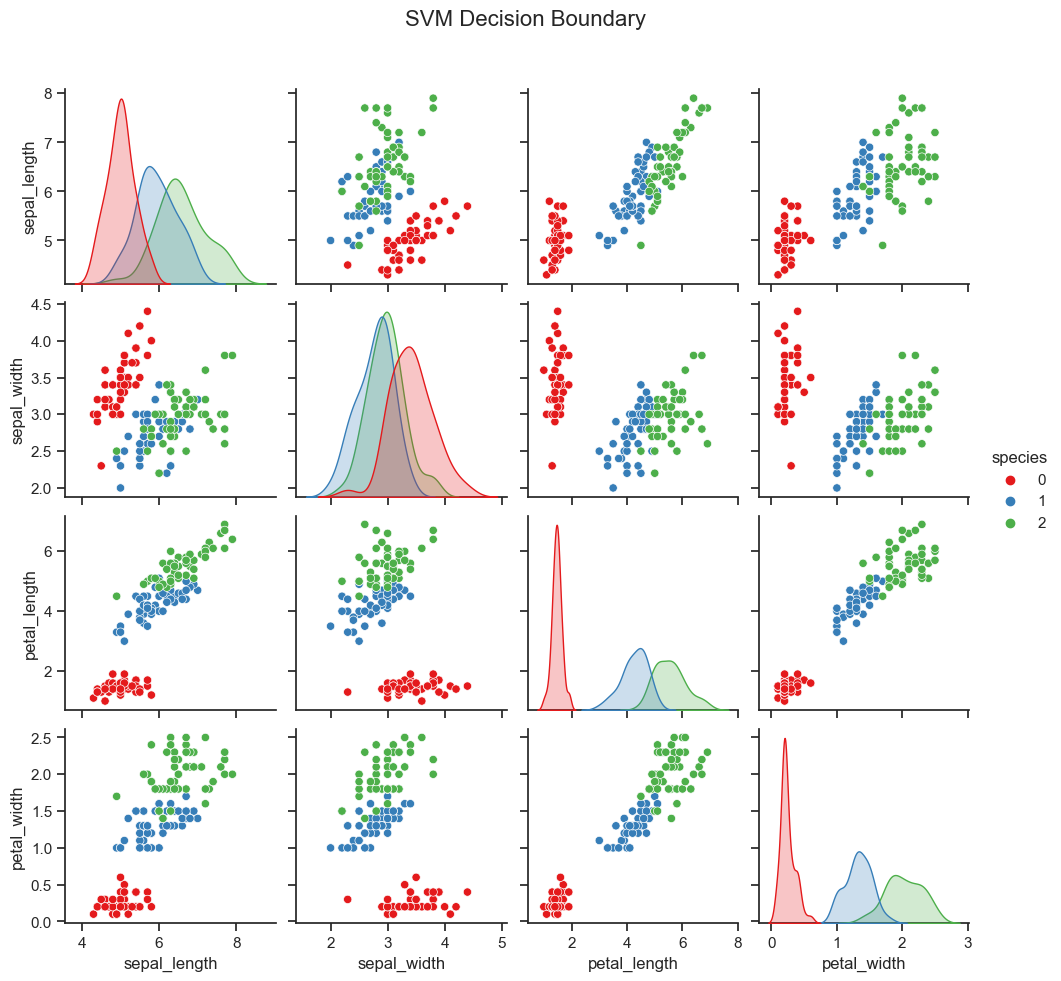

In [3]:
# Plotting decision regions for visualization
def plot_decision_regions(X, y, classifier, title):
    sns.set(style="ticks")
    sns.pairplot(df, hue="species", height=2.5, palette='Set1')
    plt.subplots_adjust(top=0.9)
    plt.suptitle(title, fontsize=16)
    plt.show()
plot_decision_regions(X_train, y_train, svm_classifier, title='SVM Decision Boundary')